# Classification and Regression models

## *What is called classification?*

![](https://miro.medium.com/max/875/1*PM4dqcAe6N7kWRpXKwgWag.png)

## *What is called regression?*

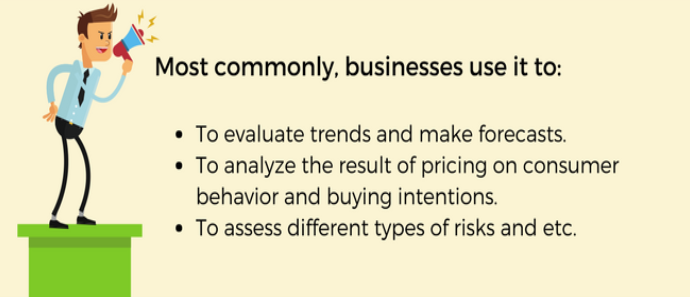

## *Classification models and types*

## *Binary classification*

![Binary classification](https://www.neuraldesigner.com/images/binary-testing-blog.jpeg)

## *Multi-class classification*

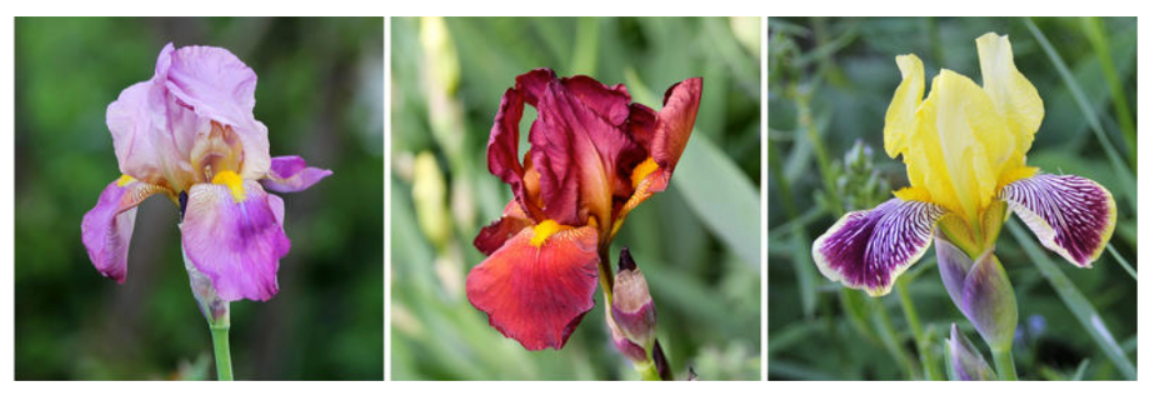

## *What is K-NN ?*

K-NN stands for K-nearest neighbors, where the class of unknown data point will be predicted by the class of its neighours present

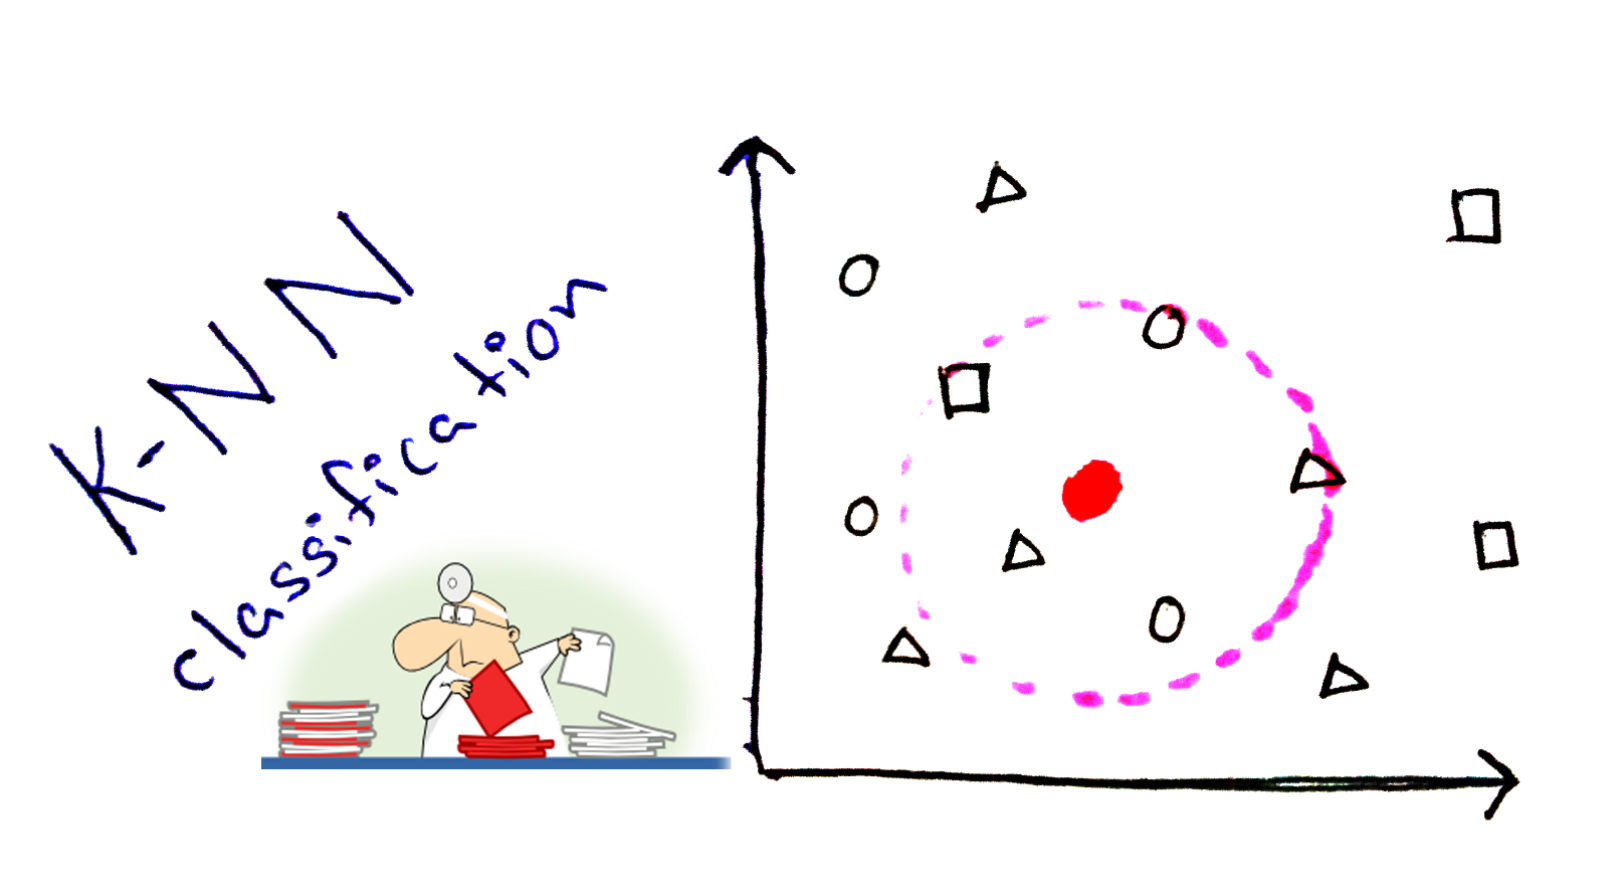

## *So how the distance is calculated?*

There are various distance measures used for K-NN

> Euclidean distance

> Manhattan distance

> Minkowski distance

## *Euclidean distance*

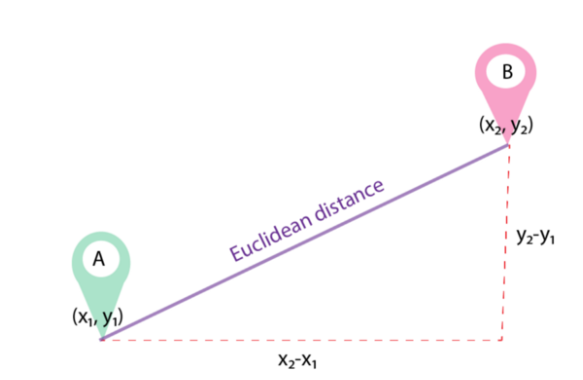

Euclidean distance is calculated as the square root of the sum of the squared differences between the two vectors.

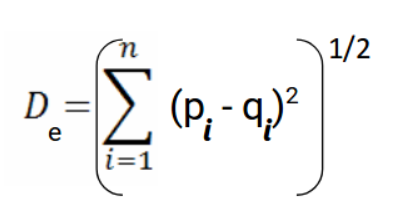

Where,

n = number of dimensions

pi, qi = data points

This calculation is related to the L2 vector norm

## *Manhattan Distance*

Manhattan Distance is the sum of absolute differences between points across all the dimensions.

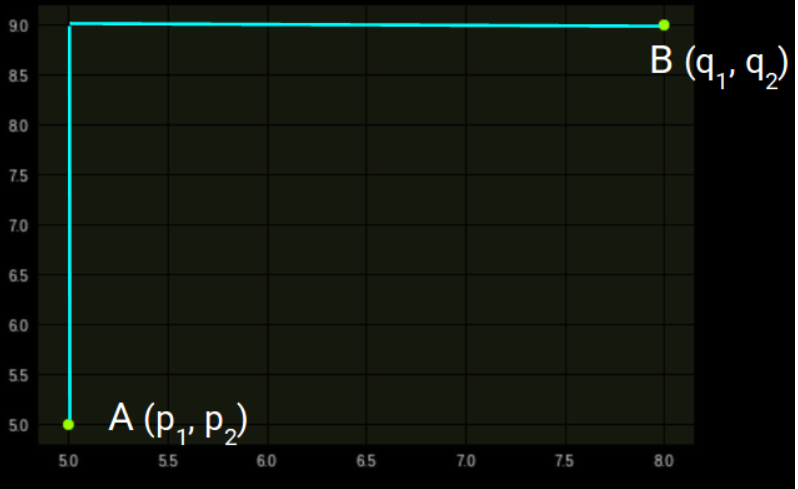

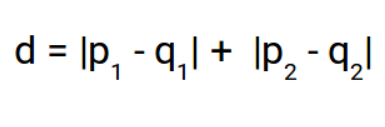

#### *Mostly Euclidean distance will be used much. We use Manhattan Distance when the dimension of data is high*

## *Minkowski Distance*

Minkowski Distance is the generalized form of Euclidean and Manhattan Distance.

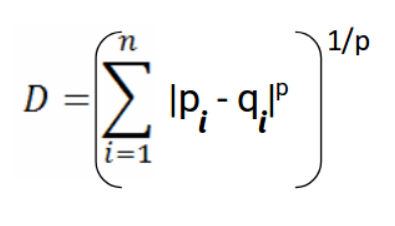

## *Cosine similiarity and cosine distance*

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity

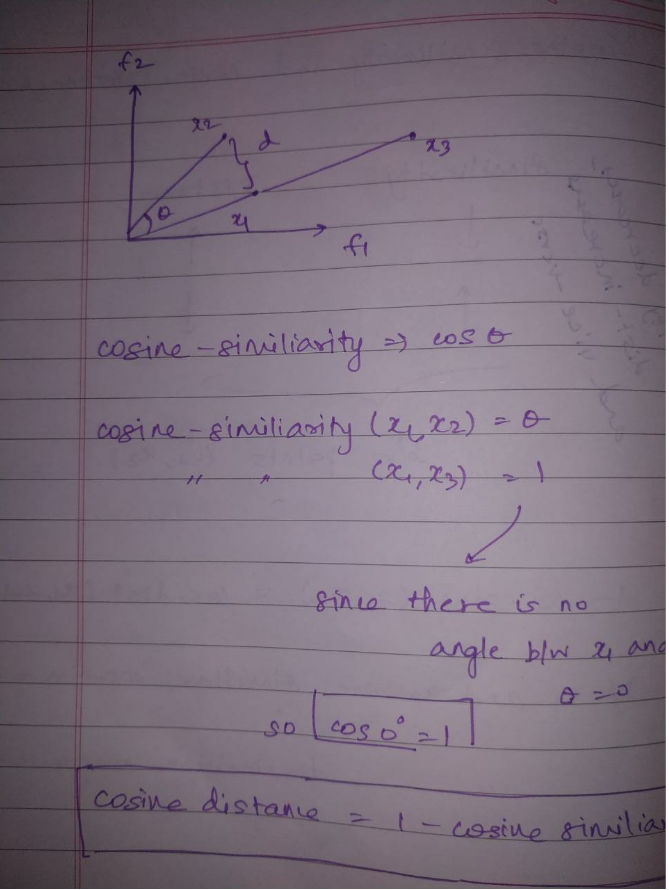

## *Effectiveness of k-NN*

For all the models, we will compute the effectiveness of it using various performance measures. 

Various performance measures including

* Precision, Recall

* Accuracy

* F1-Score

* ROC curve

* AUC curve

Among all this Accuracy is the most used performance measure

So basically we will split model into D-train and D-test, such that D-train union D-test is the total dataset, and D-train intersection D-test will be null.

The data will be splitted in the random ways

Accuracy = No.of.pts correctly classified in D-test/total no.of.pts in D-test

## *Overfitting and Underfitting*

* Overfitting - too fit/ too perfect

* underfitting- not so perfect

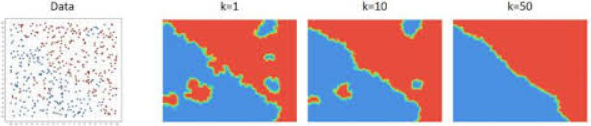

so, there were many k-values. But what is the optimal one?

There comes the concept of cross-validation

## *Cross validation*

Usually, the dataset is divided into D-train and D-test. But for cross-validation,we will split D-train to D-train and D-cv

So, we will fit D-train data in model and D-CV as test for various k-values and map the accuracy score

## ***K-fold cross validation***

When using D-CV we cant able to use D-Train completely. So to use D-train completely, we use k-fold CV

so in k-fold CV, we will split D-train into k-parts

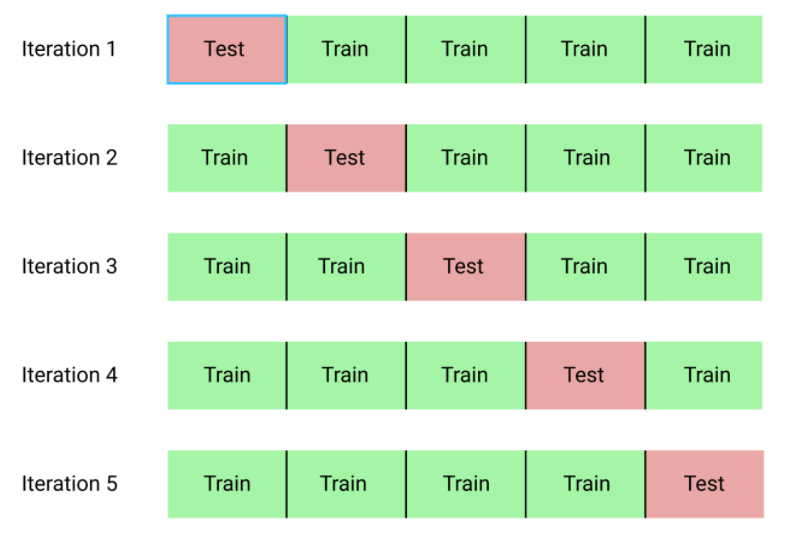

## *How to determine overfitting and underfitting*

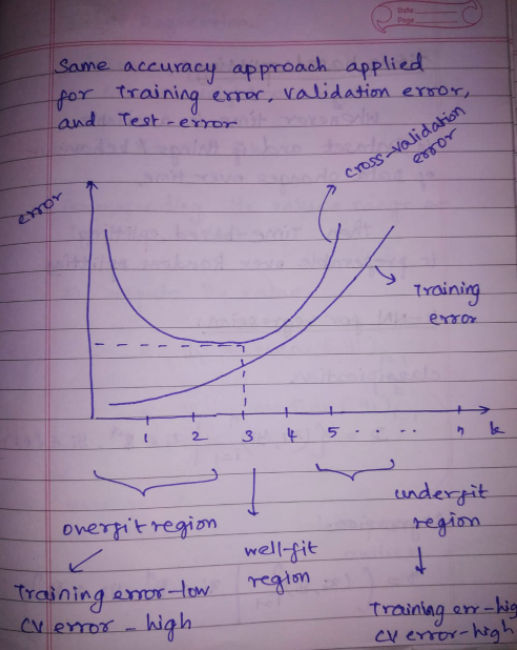

## *Other challenges*

* Imbalanced Dataset


## *Imbalanced Dataset*

Imbalanced Dataset is something, for classifications of data, there is difference in number of datapoints

for example, take spam detection dataset.

> There will be more non-spam datapoints

> There will be less spam datapoints

## *what imbalanced dataset does?*

If there are more number of negative points in data, while fitting the model with imbalanced dataset, there is high chance that given unknown point is classified as negative

## *How to overcome Imbalanced Dataset ?*

* Undersampling

* Oversampling

## *Undersampling*

In undersampling, we are randomly sampling certain datapoints (equal to the other class magnitude) and making total number of points in each class as equal

## *Problems in Undersampling*

* In Undersampling, we are simply throwing away the datapoints (throwing away the datapoints is not a good idea)

* There are some models which underperform on less data (more data implies better model)

## *Oversampling*

In Oversampling, we will create more points in minority class by repeating the points.

There are some techniques called EXTRAPOLATION, where we create synthetic points in region of minority class

## *Hyper-parameter Tuning*

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

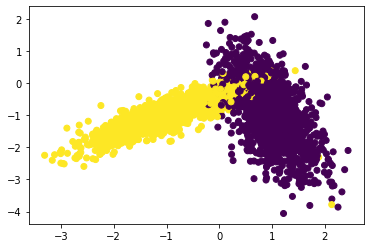

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'orange', 1:'blue'}
plt.scatter(x_test[:,0], x_test[:,1],c=y_test)
plt.show()

In [3]:
from sklearn.metrics import accuracy_score

def RandomSearchCV(x_train,y_train,classifier,param_range,folds):
    trainscores = []
    testscores  = [] 
    x_indices = np.arange(0,len(x_train),len(x_train)/folds)
    x_indices=np.append(x_indices,len(x_train))
    #print(x_indices)
    x_train_indices=np.arange(0,len(x_train))
    groups=[]
    for i in range(0,folds):
        val=int(x_indices[i])
        #print(val)
        groups.append(x_train_indices[int(x_indices[i]):int(x_indices[i+1])])
    for k in tqdm(param_range['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for i in range(0,folds):
            test_indices = groups[i]
            #print(test_indices)
            train_indices = list(set(list(range(1, len(x_train)))) - set(test_indices))
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            #print(X_train[0:5])
            #print(X_test[0:5])
            classifier.n_neighbors = int(k)
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.19s/it]


[1.0, 0.9579276922051078, 0.9575276521971062, 0.9571942521837702, 0.9567941855037674, 0.9575275721811028, 0.9574608921784357, 0.9575942788557711, 0.9579276255251051, 0.9582610388744416]
*******************************************
[0.9296000000000001, 0.9548, 0.9545333333333333, 0.9533333333333333, 0.9535999999999999, 0.9546666666666667, 0.9553333333333334, 0.9557333333333333, 0.9561333333333333, 0.9558666666666666]


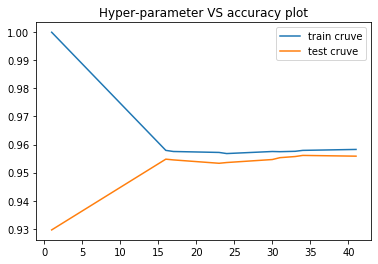

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
params=[]
while len(params)!=10:
    val=random.uniform(1,50)
    if int(val) not in params:
        params.append(int(val))
params.sort()
param_range={'n_neighbors':params}
folds = 3

trainscores,testscores = RandomSearchCV(x_train, y_train, neigh, param_range, folds)
#trainscores.argsort()
#testscores.argsort()
print(trainscores)
print('*******************************************')
print(testscores)
plt.plot(param_range['n_neighbors'],trainscores,label='train cruve')
plt.plot(param_range['n_neighbors'],testscores,label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()